In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with open('auto-mpg.data', 'r') as f:
    lines = f.readlines()
    
for index, line in enumerate(lines):
    lines[index] = line.split()
    
data = pd.DataFrame(lines, columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name', '1', '2', '3', '4', '4'])
data = data[['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
data = data[data.horsepower != '?']
data = data.apply(pd.to_numeric)

In [3]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [4]:
x_data= data[['cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y_data = data['mpg']

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

In [5]:
pd.DataFrame(x_data, columns=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']).head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0


In [6]:
print(x_data.shape)
print(y_data.shape)

(392, 6)
(392,)


In [7]:
_x = tf.placeholder(shape=[None, 6], dtype=tf.float32)
_y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
_w = tf.Variable(tf.random_normal(shape=[6, 1]), dtype=tf.float32)
_b = tf.Variable(tf.zeros([1]), dtype=tf.float32)
prediction = tf.matmul(_x, _w) + _b
loss = tf.reduce_mean(tf.square(_y - prediction))
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [8]:
epochs = 1000
batchSize = 10
feedDictTest = {_x: x_data, _y: np.transpose([y_data])}

losses = []
weights = []
biases = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prePred = sess.run([prediction], feed_dict=feedDictTest)
    
    for _ in range(epochs):
        
        currentBatch = 0
        while currentBatch < len(x_data):
            batchX = x_data[currentBatch:currentBatch+batchSize]
            batchY = y_data[currentBatch:currentBatch+batchSize]
            currentBatch += batchSize
            sess.run([optimizer], feed_dict={_x: batchX, _y: np.transpose([batchY])})
            
        l, w, b = sess.run([loss, _w, _b], feed_dict=feedDictTest)
        losses.append(l)
        weights.append(w)
        biases.append(b)
        
        if _ % 100 == 0:
            print('Epoch ', _)
            print('L: ', l)
            print('W: ', w)
            print('B: ', b)
            print('\n'*2)
            
    print('Epoch ', epochs)
    print('L: ', l)
    print('W: ', w)
    print('B: ', b)
    print('\n'*2)
    
    postPred = sess.run([prediction], feed_dict=feedDictTest)

Epoch  0
L:  468.90442
W:  [[ 1.0919304 ]
 [-0.07876312]
 [ 0.2290529 ]
 [-0.12914935]
 [ 1.6769499 ]
 [ 0.42366618]]
B:  [1.7806185]



Epoch  100
L:  20.826235
W:  [[-2.2017024 ]
 [-3.814054  ]
 [-0.88526344]
 [-3.0358438 ]
 [ 9.722444  ]
 [11.008479  ]]
B:  [16.912552]



Epoch  200
L:  17.400387
W:  [[-3.3018277]
 [-4.881126 ]
 [-1.0560659]
 [-5.119504 ]
 [ 9.352103 ]
 [10.720386 ]]
B:  [19.13059]



Epoch  300
L:  16.069944
W:  [[-3.444295  ]
 [-5.131102  ]
 [-0.79135275]
 [-6.4863067 ]
 [ 8.448825  ]
 [10.033181  ]]
B:  [20.544819]



Epoch  400
L:  15.159511
W:  [[-3.4094136]
 [-5.2198787]
 [-0.5255082]
 [-7.643868 ]
 [ 7.5240197]
 [ 9.539133 ]]
B:  [21.626396]



Epoch  500
L:  14.487652
W:  [[-3.3137405 ]
 [-5.2455816 ]
 [-0.30484098]
 [-8.674879  ]
 [ 6.6582403 ]
 [ 9.222469  ]]
B:  [22.495375]



Epoch  600
L:  13.973847
W:  [[-3.1862755]
 [-5.232653 ]
 [-0.1288994]
 [-9.605235 ]
 [ 5.868854 ]
 [ 9.025309 ]]
B:  [23.209415]



Epoch  700
L:  13.572246
W:  [[-3.0405550e+00]
 

In [9]:
print('Pre Train Loss: ', mean_absolute_error(y_true=y_data, y_pred=np.array(prePred).reshape(-1)))
print('Post Train Loss: ', mean_absolute_error(y_true=y_data, y_pred=np.array(postPred).reshape(-1)))

Pre Train Loss:  23.690765974404556
Post Train Loss:  2.765570222601599


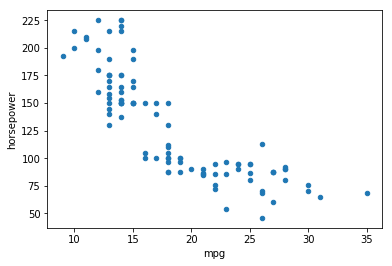

In [10]:
data.iloc[:100].plot('mpg', 'horsepower', kind='scatter')

Text(0,0.5,'Loss')

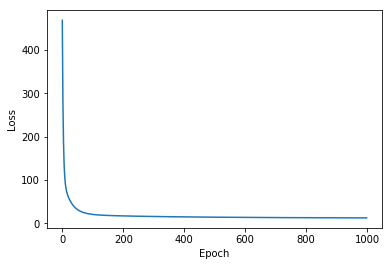

In [11]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0,0.5,'Weight [Horsepower]')

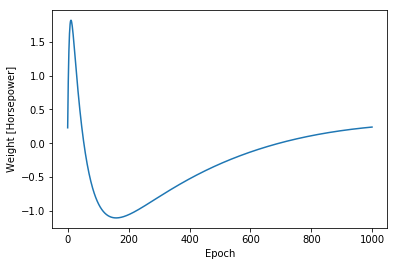

In [12]:
plt.plot(range(epochs), np.array(weights)[:, 2])
plt.xlabel('Epoch')
plt.ylabel('Weight [Horsepower]')

Text(0,0.5,'Bias')

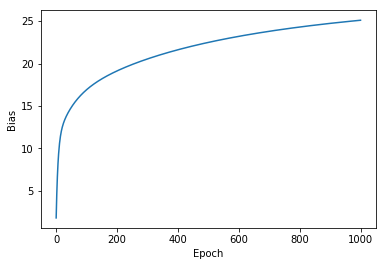

In [13]:
plt.plot(range(epochs), biases)
plt.xlabel('Epoch')
plt.ylabel('Bias')